In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import pandas as pd
from PIL import Image

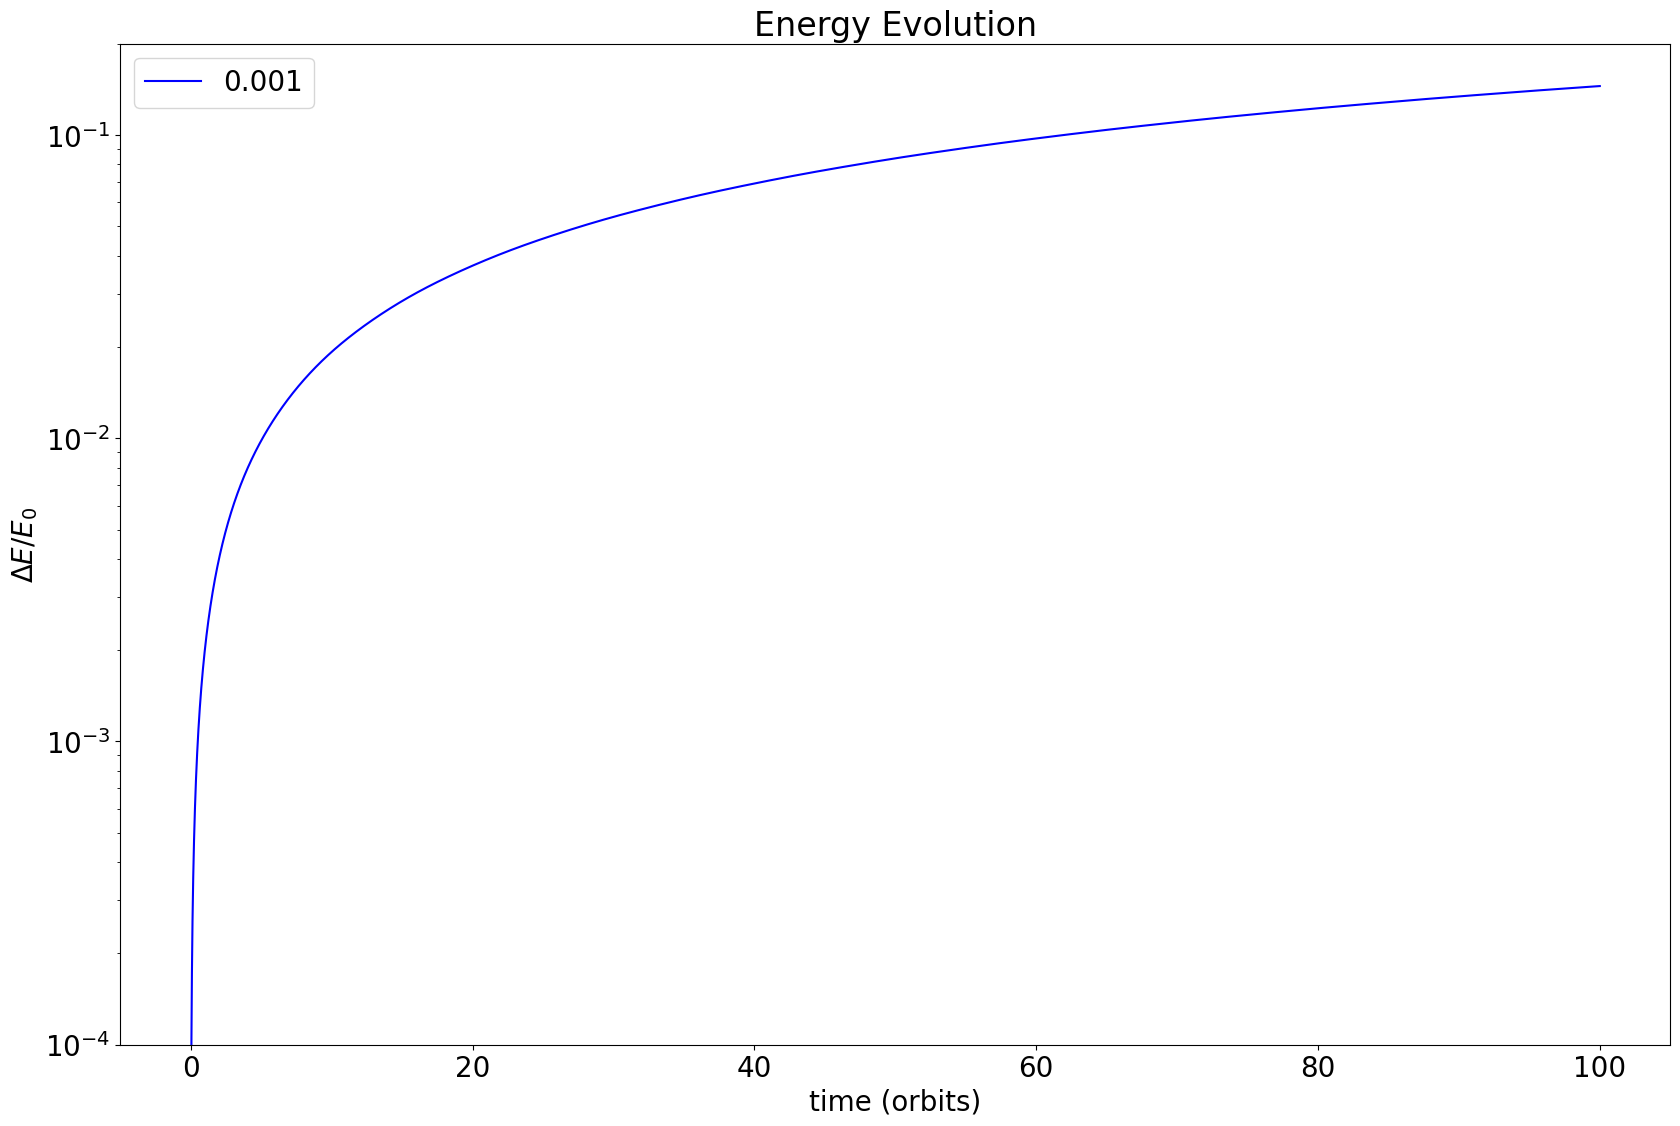

In [2]:
# Importing the dataset
filename = 'C:/Users/julio/Downloads/Hydrodynamics/Euler/Data/Morales_Euler.txt'

# Load the data from text file into dataframe using pandas
dataset = pd.read_csv(filename, delim_whitespace=True)

# Extract the data
dt = 1e-3
G  = 1.0
q  = 3e-6
mp = q 
ms = 1-q
t  = dataset['time(n)']
xp = dataset['xplanet']
yp = dataset['yplanet']
xs = dataset['xstar']
ys = dataset['ystar']

vxp = dataset['vxplanet']
vyp = dataset['vyplanet']
vxs = dataset['vxstar']
vys = dataset['vystar']

# Compute the energy
energy = 0.5 * (mp * (vxp**2+vyp**2) + ms * (vxs**2+vys**2)) - G*mp*ms/np.sqrt((xp-xs)**2 + (yp-ys)**2)

# Plot the data
plt.rc('font', size=20)
plt.figure(figsize = (20, 13))
plt.plot(t ,abs((energy -energy[0] )/energy [0]), 'b-', label = f'time-step: {dt:.3f}')
plt.ylabel('$\Delta E / E_0$')
plt.xlabel('time (orbits)')
plt.title("Energy Evolution")
plt.yscale('log')
plt.ylim([1e-4, 0.2])
plt.legend(loc = 'best')
plt.savefig('C:/Users/julio/Downloads/Hydrodynamics/Euler/Plots/Energy_Evolution.jpg', dpi = 300)
plt.show()

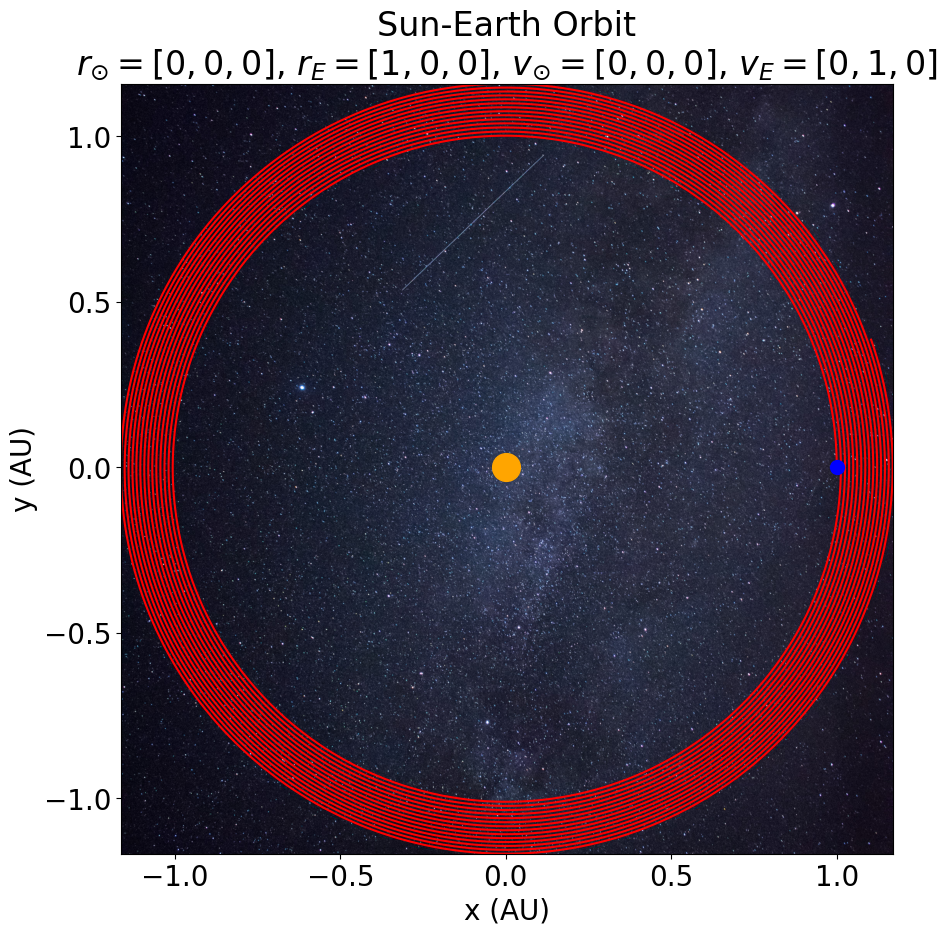

In [3]:
# Load image
img = Image.open("C:/Users/julio/Downloads/Hydrodynamics/space.jpg")

# Convert image to array and set figure size to match image
im_array = np.asarray(img)

# Make plot
plt.figure(figsize = (10, 10))
plt.imshow(im_array, extent=[min(xp), max(xp), min(yp), max(yp)])
plt.plot(xp, yp, 'r-')
plt.plot(0, 0, 'o', color='orange', markersize=20)
plt.plot(xp[0], yp[0], 'o', color='blue', markersize=10)
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Sun-Earth Orbit' + '\n' + r'$r_{\odot} = [0, 0, 0]$, $r_{E} = [1, 0, 0]$, $v_{\odot} = [0, 0, 0]$, $v_{E} = [0, 1, 0]$')
plt.savefig('C:/Users/julio/Downloads/Hydrodynamics/Euler/Plots/Orbit.jpg', dpi = 300)
plt.show()

## Fun Animation Stuff

In [4]:
# # Define the meta data for the movie
# FFMpegWriter = manimation.writers['ffmpeg']
# metadata = dict(title = 'Two-Body Problem: Euler', artist = 'Julio Morales', comment = 'Earth-Sun System')
# writer = FFMpegWriter(fps = 180, metadata = metadata)

# # Initialize the movie
# plt.rc('font', size = 20)
# fig = plt.figure(figsize = (10, 10))

# # Plot the orbits
# planet_orbit, = plt.plot(xp, yp, 'r')

# # Plot the bodies
# planet_bcircle, = plt.plot([], [], 'bo', markersize = 10)

# # Label the axes
# plt.xlabel('x (AU)')
# plt.ylabel('y (AU)')
# plt.title('Two-Body Problem: Euler')

# # Update the frames for the movie
# with writer.saving(fig, "C:/Users/julio/Downloads/Hydrodynamics/two_body_problem_euler.mp4", 100):
#     for i in range(len(xp)):

#         # Define positions of bodies
#         xp0 = xp[i]
#         yp0 = yp[i]

#         planet_bcircle.set_data(xp0, yp0)
#         writer.grab_frame()